In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from numpy import array
from numpy import vstack
from numpy import dstack
from pandas import read_csv
from pandas import DataFrame
from numpy import unique
from matplotlib import pyplot

In [2]:
path = r'/Users/yourname/Datasets'

In [4]:
df = pd.read_csv(os.path.join(path, 'UCI HAR Dataset','train', 'Inertial Signals', 'total_acc_y_train.txt'), index_col = False, header=None, delim_whitespace=True)

In [5]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.123217,-0.126876,-0.124004,-0.124928,-0.125767,-0.124462,-0.127361,-0.127891,-0.125868,-0.124368,...,-0.123493,-0.121995,-0.123910,-0.127970,-0.128295,-0.127010,-0.126185,-0.124070,-0.122745,-0.121326
1,-0.123976,-0.126808,-0.127786,-0.126655,-0.123634,-0.124919,-0.124300,-0.119798,-0.119222,-0.120174,...,-0.117672,-0.119885,-0.122055,-0.122978,-0.122969,-0.127339,-0.132329,-0.129027,-0.126424,-0.130519
2,-0.120016,-0.121499,-0.122841,-0.123717,-0.123817,-0.121304,-0.121258,-0.125411,-0.129458,-0.129856,...,-0.134438,-0.133090,-0.134369,-0.133016,-0.130937,-0.130473,-0.130305,-0.130876,-0.131210,-0.130183
3,-0.133404,-0.134364,-0.135203,-0.134048,-0.130632,-0.123746,-0.118772,-0.122888,-0.127193,-0.126323,...,-0.127894,-0.127629,-0.129888,-0.130819,-0.128451,-0.126481,-0.127507,-0.131986,-0.134507,-0.133316
4,-0.128731,-0.127846,-0.128230,-0.129854,-0.132752,-0.133991,-0.131159,-0.129970,-0.131889,-0.133298,...,-0.121851,-0.122087,-0.123337,-0.124236,-0.127601,-0.126752,-0.124824,-0.124559,-0.121456,-0.123494
5,-0.132736,-0.132676,-0.131761,-0.131950,-0.134115,-0.134460,-0.131153,-0.128172,-0.129584,-0.131798,...,-0.123904,-0.121630,-0.120350,-0.122064,-0.124566,-0.124948,-0.122274,-0.119525,-0.118807,-0.118157
6,-0.126084,-0.121604,-0.118849,-0.119365,-0.119775,-0.121224,-0.125456,-0.129379,-0.128045,-0.126270,...,-0.139994,-0.132902,-0.131462,-0.130697,-0.131049,-0.134365,-0.138675,-0.143079,-0.145994,-0.147544
7,-0.117468,-0.118386,-0.118219,-0.117961,-0.120242,-0.121788,-0.124627,-0.131097,-0.134825,-0.131623,...,-0.135588,-0.134708,-0.133208,-0.134409,-0.132702,-0.131601,-0.132419,-0.134563,-0.137074,-0.135157
8,-0.150808,-0.149557,-0.144192,-0.143927,-0.142068,-0.137199,-0.136801,-0.142730,-0.149513,-0.144044,...,-0.134197,-0.136168,-0.136027,-0.137985,-0.138617,-0.140626,-0.143473,-0.140222,-0.135211,-0.137993
9,-0.134361,-0.136845,-0.137827,-0.136429,-0.133631,-0.132922,-0.133402,-0.132998,-0.131623,-0.130739,...,-0.121289,-0.118935,-0.122399,-0.124166,-0.128007,-0.136735,-0.139763,-0.136145,-0.130173,-0.127373


In [6]:
# Note you have to use the '\\' character to escape an EOL error because Python interprets \' as an escape function.

In [7]:
# Load all nine files from each of the train and test dataset to a 3D array with X, Y, and Z data.
 
# load a single file as a numpy array
def load_file(filepath):
    df3dx2 = pd.read_csv(filepath, index_col = False, header=None, delim_whitespace=True)
    return df3dx2.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

# summarize the balance of classes in an output variable column
def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
    filepath = prefix + group + '\\Inertial Signals\\'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '\\y_'+group+'.txt')
    return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
    # return the selected samples
    return X[ix, :, :], y[ix]
 
# convert a series of windows to a 1D list
def to_series(windows):
    series = list()
    for window in windows:
        # remove the overlap from the window
        half = int(len(window) / 2) - 1
        for value in window[-half:]:
            series.append(value)
    return series

# load all train
trainX, trainy = load_dataset('train', r'D:\Dropbox\Home and Business\Cat and Professional\CareerFoundry\Course Refreshes\2022 October Machine Learning\Datasets\UCI HAR Dataset\\')
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test', r'D:\Dropbox\Home and Business\Cat and Professional\CareerFoundry\Course Refreshes\2022 October Machine Learning\Datasets\UCI HAR Dataset\\')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [8]:
# summarize class breakdown
print('Train Dataset')
class_breakdown(trainy)
 
# summarize class breakdown
print('Test Dataset')
class_breakdown(testy)
 
# summarize combined class breakdown
print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


In [ ]:
#Note the consistent percentage of activites between the sets.

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


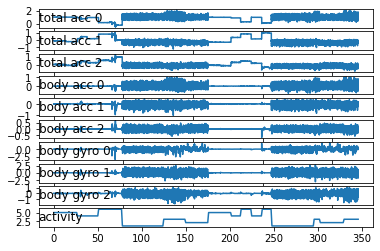

In [9]:
# plot the data for one subject
def plot_subject(X, y):
    pyplot.figure()
    # determine the total number of plots
    n, off = X.shape[2] + 1, 0
    # plot total acc
    for i in range(3):
        pyplot.subplot(n, 1, off+1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('total acc '+str(i), y=0, loc='left')
        off += 1
    # plot body acc
    for i in range(3):
        pyplot.subplot(n, 1, off+1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('body acc '+str(i), y=0, loc='left')
        off += 1
    # plot body gyro
    for i in range(3):
        pyplot.subplot(n, 1, off+1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('body gyro '+str(i), y=0, loc='left')
        off += 1
    # plot activities
    pyplot.subplot(n, 1, n)
    pyplot.plot(y)
    pyplot.title('activity', y=0, loc='left')
    pyplot.show()
 
#load mapping of rows to subjects
sub_map = load_file(r'D:\Dropbox\Home and Business\Cat and Professional\CareerFoundry\Course Refreshes\2022 October Machine Learning\Datasets\UCI HAR Dataset\\train\\subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[0] #Pick a subject here, from 0 to 20
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

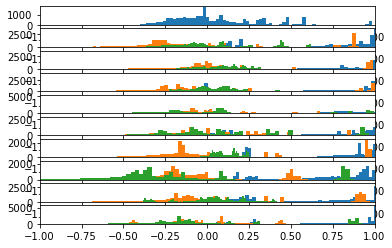

In [10]:
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
    pyplot.figure()
    # get unique subjects
    subject_ids = unique(sub_map[:,0])
    # enumerate subjects
    xaxis = None
    for k in range(n):
        sub_id = subject_ids[k]
        # get data for one subject
        subX, _ = data_for_subject(X, y, sub_map, sub_id)
        # total acc
        for i in range(3):
            ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k == 0:
                xaxis = ax
            pyplot.hist(to_series(subX[:,:,i]), bins=100)
    pyplot.show()

#Plot accel data
plot_subject_histograms(trainX, trainy, sub_map)

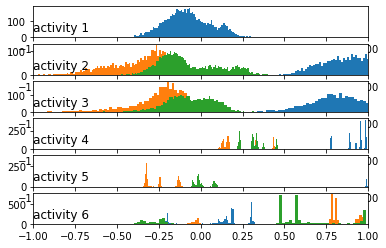

In [11]:
# group data by activity
def data_by_activity(X, y, activities):
    # group windows by activity
    return {a:X[y[:,0]==a, :, :] for a in activities}
 
# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
    # get a list of unique activities for the subject
    activity_ids = unique(y[:,0])
    # group windows by activity
    grouped = data_by_activity(X, y, activity_ids)
    # plot per activity, histograms for each axis
    pyplot.figure()
    xaxis = None
    for k in range(len(activity_ids)):
        act_id = activity_ids[k]
        # total acceleration
        for i in range(3):
            ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k == 0:
                xaxis = ax
            pyplot.hist(to_series(grouped[act_id][:,:,i]), bins=100)
            pyplot.title('activity '+str(act_id), y=0, loc='left')
    pyplot.show()
 
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
# plot data for subject
plot_activity_histograms(subX, suby)

In [12]:
#Above are histograms for each activity.
#What insights can you draw from looking at this data?